In [1]:
from gensim.models import Word2Vec
import numpy as np


sentences = [
    ["I", "went", "to", "bank", "to", "deposit", "money"],
    ["I", "went", "to", "river", "bank", "to", "spend", "holiday"],
    ["He", "withdrew", "cash", "from", "the", "bank"],
    ["The", "river", "bank", "was", "covered", "in", "greenery"],
    ["The", "financial", "bank", "provides", "loans"],
    ["They", "built", "a", "house", "near", "the", "river", "bank"],
]


model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)


bank_embedding_financial = model.wv["bank"]
bank_embedding_river = model.wv["bank"]


similarity = np.dot(bank_embedding_financial, bank_embedding_river) / (
    np.linalg.norm(bank_embedding_financial) * np.linalg.norm(bank_embedding_river)
)

# Return similarity score
similarity


0.99999994

In [5]:


def sentence_embedding(sentence, model):
    """Compute sentence embedding by averaging word vectors."""
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Get sentence embeddings
sent1_embedding = sentence_embedding(["I", "went", "to", "bank", "to", "deposit", "money"], model)
sent2_embedding = sentence_embedding(["I", "went", "to", "river", "bank", "to", "spend", "holiday"], model)

# Compute cosine similarity between the two sentence embeddings
sentence_similarity = np.dot(sent1_embedding, sent2_embedding) / (
    np.linalg.norm(sent1_embedding) * np.linalg.norm(sent2_embedding)
)

sentence_similarity


0.71920395

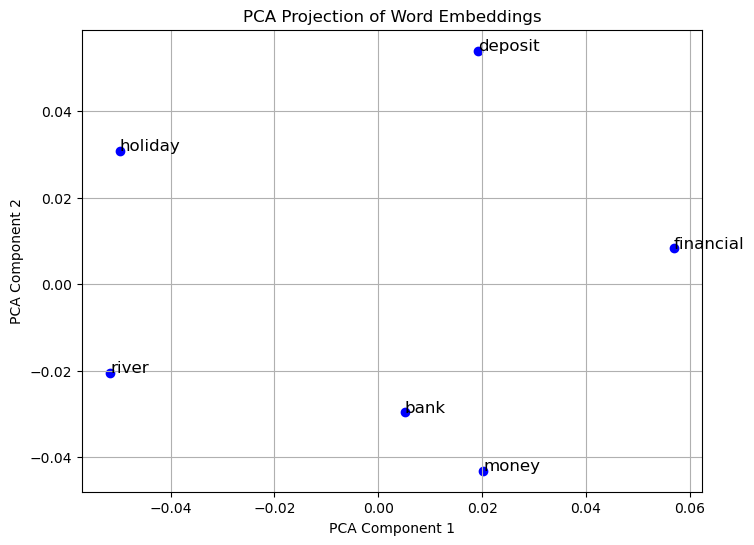

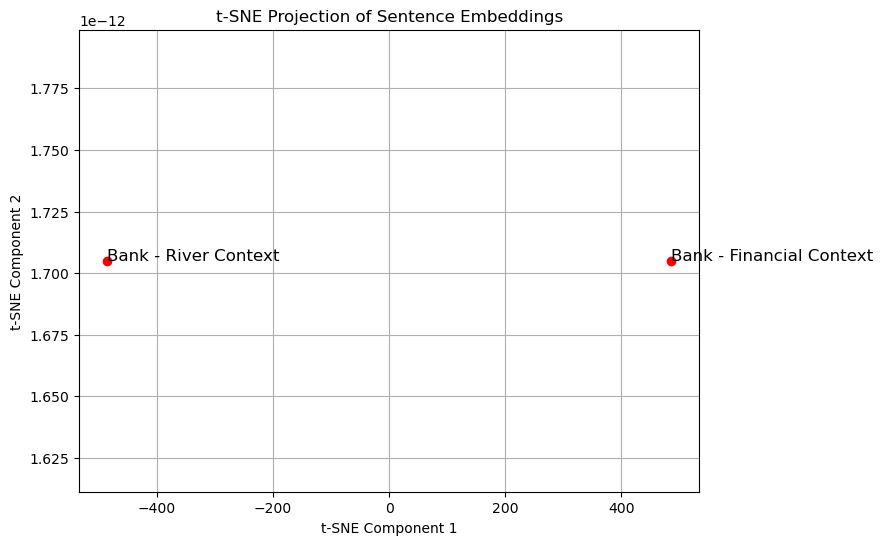

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Collect words to visualize
words = ["bank", "river", "money", "deposit", "holiday", "financial"]

# Get embeddings for the words
word_vectors = np.array([model.wv[word] for word in words])
# print(word_vectors)
# Apply PCA for dimensionality reduction (50D -> 2D)
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], color="blue")

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=12)

plt.title("PCA Projection of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


sentence_vectors = np.array([sent1_embedding, sent2_embedding])

tsne = TSNE(n_components=2, perplexity=1, random_state=42)
sentence_vectors_tsne = tsne.fit_transform(sentence_vectors)

# Plot sentence embeddings again
plt.figure(figsize=(8, 6))
plt.scatter(sentence_vectors_tsne[:, 0], sentence_vectors_tsne[:, 1], color="red")

# Annotate each point
for i in range(len(sentences)):
    plt.annotate(sentences[i], (sentence_vectors_tsne[i, 0], sentence_vectors_tsne[i, 1]), fontsize=12)

plt.title("t-SNE Projection of Sentence Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.show()




In [11]:
from sklearn.metrics.pairwise import cosine_similarity


bank_financial = model.wv["bank"]  # From "I went to bank to deposit money"
bank_river = model.wv["bank"]  # From "I went to river bank to spend holiday"


bank_similarity = cosine_similarity([bank_financial], [bank_river])[0][0]

# Get sentence embeddings
def sentence_embedding(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

sent1_embedding = sentence_embedding(["I", "went", "to", "bank", "to", "deposit", "money"], model)
sent2_embedding = sentence_embedding(["I", "went", "to", "river", "bank", "to", "spend", "holiday"], model)

# Compute similarity between full sentence embeddings
sentence_similarity = cosine_similarity([sent1_embedding], [sent2_embedding])[0][0]


print(f"Similarity between 'bank' in different contexts: {bank_similarity:.4f}")
print(f"Similarity between the two sentences: {sentence_similarity:.4f}")


Similarity between 'bank' in different contexts: 1.0000
Similarity between the two sentences: 0.7192


In [12]:
sent1_embedding

array([-4.5148619e-03,  7.4045890e-04, -5.7492531e-03,  1.3393536e-03,
       -1.4927571e-03, -9.7106099e-03,  5.7592830e-03, -3.0384529e-03,
       -6.5171025e-03, -1.7435128e-03,  6.7136399e-03, -8.5997023e-04,
        1.5505438e-03, -7.5857394e-04, -4.2628581e-03,  4.4804499e-03,
        5.9180856e-03,  4.0827361e-03, -9.8442594e-03, -1.5726507e-03,
        6.6413931e-03,  8.2714679e-03,  6.9201216e-03, -2.6373060e-05,
        3.0113629e-03,  1.0118197e-03,  9.2686340e-03,  3.6946766e-03,
       -4.6665976e-03, -4.6852911e-03,  1.5401257e-03, -1.4455783e-03,
       -7.0510461e-04,  2.8525516e-03, -4.6598078e-03,  1.3942432e-04,
        7.8185899e-03, -1.2190641e-02, -5.6264466e-03,  2.7570555e-03,
       -8.1222656e-04,  3.1213940e-03,  5.2525499e-03, -5.2912729e-03,
        1.0629089e-02,  8.1508989e-03, -4.6678861e-03, -6.2916242e-03,
        1.6810298e-03,  4.4328300e-03], dtype=float32)

In [13]:
# Extract word embeddings for "bank" in both sentences
bank_embedding_financial = model.wv["bank"]  # From "I went to bank to deposit money"
bank_embedding_river = model.wv["bank"]  # From "I went to river bank to spend holiday"

# Print embeddings
print("Embedding for 'bank' in financial context:\n", bank_embedding_financial)
print("\nEmbedding for 'bank' in river context:\n", bank_embedding_river)


Embedding for 'bank' in financial context:
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]

Embedding for 'bank' in river context:
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-0

#findings


 Word2Vec is not context-aware—it assigns a single fixed vector to each word, regardless of its meaning in different sentences. That’s why "bank" has the same embedding in both contexts.

How to Get Different Embeddings for "Bank" in Each Context?
You need a contextual word embedding model like BERT or ELMo, which generates different embeddings based on the sentence structure. Would you like to try it with BERT? I can show you how to extract different embeddings for "bank" using Hugging Face’s Transformers. 

In [18]:
import spacy

In [20]:
!python -m spacy download en_core_web_sm


C:\Users\SaikishorePichili\intelpython3\python.exe: No module named spacy


In [2]:
import spacy
from sense2vec import Sense2Vec

In [3]:
import spacy

# Load the model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")


Model loaded successfully!


In [11]:
import spacy

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = """
Financial institutions like banks are critical to the economy. 
People deposit money in the bank to secure their savings. 
On the other hand, a riverbank is a place where the river meets the land.
"""

# Process the text with SpaCy
doc = nlp(text)

# Prepare sentences with POS tagging
sentences = []
for sent in doc.sents:
    sentences.append([f"{token.text}|{token.pos_}" for token in sent if not token.is_stop])

# Print prepared sentences
for sentence in sentences:
    print(sentence)


['\n|SPACE', 'Financial|ADJ', 'institutions|NOUN', 'like|ADP', 'banks|NOUN', 'critical|ADJ', 'economy|NOUN', '.|PUNCT', '\n|SPACE']
['People|NOUN', 'deposit|VERB', 'money|NOUN', 'bank|NOUN', 'secure|VERB', 'savings|NOUN', '.|PUNCT', '\n|SPACE']
['hand|NOUN', ',|PUNCT', 'riverbank|NOUN', 'place|NOUN', 'river|NOUN', 'meets|VERB', 'land|NOUN', '.|PUNCT', '\n|SPACE']


In [17]:
import numpy as np

def save_glove_to_current_directory(glove_file):
    # Read the GloVe file and save vectors in the current directory
    word_vectors = {}
    
    with open(glove_file, 'r', encoding="utf-8") as f:
        for line in f:
            tokens = line.split()
            word = tokens[0]
            vector = np.array(tokens[1:], dtype=float)
            word_vectors[word] = vector
            
    # Save the vectors in the current directory in a pickle file for later use
    np.save('glove_vectors.npy', word_vectors)  # This will save as glove_vectors.npy

    print("GloVe vectors saved to current directory.")
    
# Example usage:
# Provide the path to your downloaded GloVe file (adjust the path as necessary)
glove_file = "/glove.6B.300d.txt"  # Update this with the correct path
save_glove_to_current_directory(glove_file)


FileNotFoundError: [Errno 2] No such file or directory: '/glove.6B.300d.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/SaikishorePichili/OneDrive - HealthOnUs Technologies Pvt Ltd/Documents/topic modelling/glove.6B.300d.txt'

In [20]:
import os

file_path = "C:/Users/SaikishorePichili/OneDrive - HealthOnUs Technologies Pvt Ltd/Documents/topic modelling/glove.6B.300d.txt"

# Check if file exists
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Please check the path.")


File not found. Please check the path.


In [21]:
import gensim.downloader as api

vectors = api.load('glove-wiki-gigaword-50')
vectors.save('vectors.bin')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [22]:
from gensim.models import KeyedVectors

# Load the binary GloVe model
glove_bin_file = "vectors.bin"  
glove_model = KeyedVectors.load_word2vec_format(glove_bin_file, binary=True)


print(glove_model["bank"])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte